<a href="https://colab.research.google.com/github/Sahil-Jagadale/DL/blob/main/DL_Autoencoder_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
x = df.drop('Class', axis=1)
y = df['Class']

In [6]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=2)
x_normal = x_train[y_train == 0]

In [8]:
input_dim = x_normal.shape[1]

input_layer = Input(shape=(input_dim,))

encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)

latent = Dense(4, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(latent)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
history = autoencoder.fit(x_normal,x_normal, epochs=20, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0304 - val_loss: 0.9094
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9085 - val_loss: 0.8741
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8614 - val_loss: 0.8637
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8560 - val_loss: 0.8568
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8615 - val_loss: 0.8513
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8445 - val_loss: 0.8472
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8465 - val_loss: 0.8427
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8551 - val_loss: 0.8390
Epoch 9/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8458 - val_loss: 0.8367
Epoch 10/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8428 - val_loss: 0.8351
Epoch 11/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.8278 - val_loss: 0.8334
Epoch 12/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [12]:
reconstruction = autoencoder.predict(x_normal)
recon_errors = np.mean(np.square(reconstruction-x_normal), axis=1)

threshold = np.percentile(recon_errors,95)
print(threshold)

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1.6697215226946927


In [13]:
prediction = autoencoder.predict(x_test)
pred_erros = np.mean(np.square(prediction - x_test), axis=1)

y_pred = [1 if error > threshold else 0 for error in pred_erros]

accuracy = accuracy_score(y_pred,y_test)
confusion_matrix = confusion_matrix(y_pred,y_test)
classification_report = classification_report(y_pred,y_test)

print("Accuracy: ",accuracy)
print("Confusion Matrix: ",confusion_matrix)
print("Classification Report: ",classification_report)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy:  0.9497033109792493
Confusion Matrix:  [[54022     9]
 [ 2856    75]]
Classification Report:                precision    recall  f1-score   support

           0       0.95      1.00      0.97     54031
           1       0.89      0.03      0.05      2931

    accuracy                           0.95     56962
   macro avg       0.92      0.51      0.51     56962
weighted avg       0.95      0.95      0.93     56962



In [14]:
anamolies = pred_erros > threshold

num_anomalies = np.sum(anamolies)

print("Total number of anamolies are: ",num_anomalies)

Total number of anamolies are:  2931


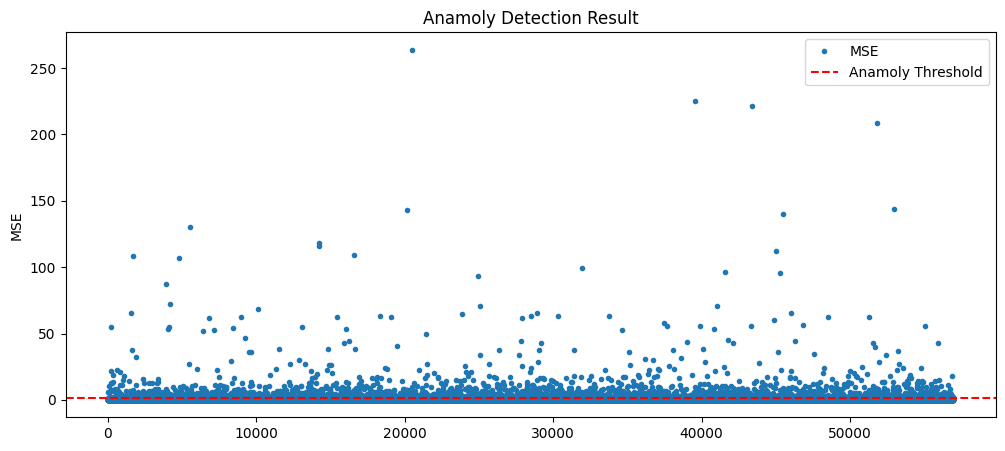

In [16]:
plt.figure(figsize=(12,5))
plt.plot(pred_erros, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anamoly Threshold')
plt.ylabel('MSE')
plt.title('Anamoly Detection Result')
plt.legend()
plt.show()

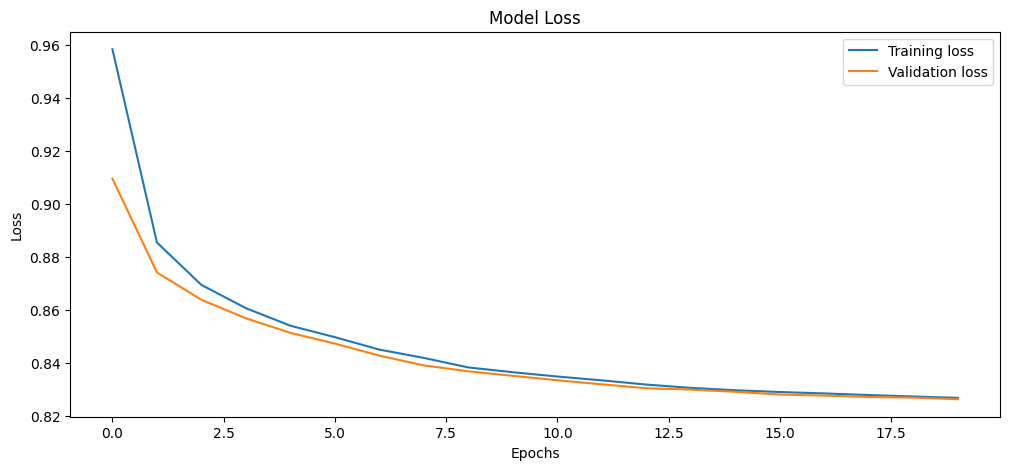

In [18]:
plt.figure(figsize=(12,5))


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()